In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,linear_model,cross_validation,preprocessing,neighbors
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=pd.read_csv('./bank.csv')
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64
4521
4521


/home/pritam/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


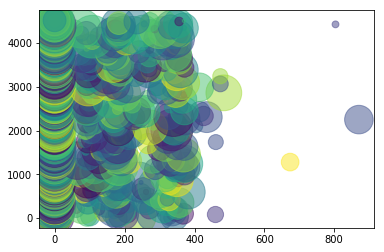

In [4]:
#print(data['duration'].describe())
#print(len(data['duration']))
import random
color=[]
size=[]
for i in range(len(data['pdays'])):
    a=random.randint(-100,100)
    b=random.randrange(-100,100)*random.randrange(2,7)
    b=3.14*b
    size.append(b)
    color.append(a)
print(data['pdays'].describe())
arr=[]
for i in range(len(data['pdays']+1)):
    arr.append(i)
print(len(arr))
print(len(data['pdays']))
plt.scatter(data['pdays'],arr,c=color,s=size,alpha=0.5)
plt.show()


In [5]:
print(data['education'].unique())
print(data['marital'].unique())
print(data['housing'].unique())
print(data['loan'].unique())
print(data['default'].unique())
print(data['contact'].unique())

['primary' 'secondary' 'tertiary' 'unknown']
['married' 'single' 'divorced']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']


In [6]:
for i in data.columns:
    print(data[i].unique())

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49 78
 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
[ 1787  4789  1350 ...,  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8 28
  9  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261   89
  189  239  114  250  148   96  140  109  125  169  182  247  119  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205   11
  105   59  425  204  181 1018 1740   98  441  272  1

In [7]:
print(data.head(4))

   age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   
2   35  management   single   tertiary      no     1350     yes   no   
3   30  management  married   tertiary      no     1476     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  


In [8]:
del data['month'],data['pdays']
print(data.head(5))

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  duration  campaign  previous poutcome   y  
0  cellular   19        79         1         0  unknown  no  
1  cellular   11       220         1         4  failure  no  
2  cellular   16       185         1         1  failure  no  
3   unknown    3       199         4         0  unknown  no  
4   unknown    5       226         1         0  unknown  no  


count    4521.000000
mean        0.542579
std         1.693562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: previous, dtype: float64
0.0
0    0
dtype: int64
99


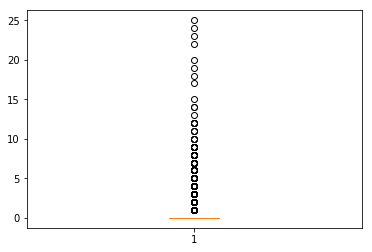

In [9]:
print(data['previous'].describe())
print(data['previous'].median())
print(data['previous'].mode())
count=0
for i in data['previous']:
    if i > 5:
        count+=1
print(count)
plt.boxplot(data['previous'])
plt.show()

In [10]:
print(data['job'].unique())

print(data.head())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  duration  campaign  previous poutcome   y  
0  cellular   19        79         1         0  unknown  no  
1  cellular   11       220         1         4  failure  no  
2  cellular   16       185         1         1  failure  no  
3   unknown    3       199         4         0  unknown  no  
4   unknown    5       226         1         0  unknown  no  


In [11]:
print(data.head())  # corresponds to "no" in y and 1 corresponds to "yes"

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  duration  campaign  previous poutcome   y  
0  cellular   19        79         1         0  unknown  no  
1  cellular   11       220         1         4  failure  no  
2  cellular   16       185         1         1  failure  no  
3   unknown    3       199         4         0  unknown  no  
4   unknown    5       226         1         0  unknown  no  


In [12]:
count1=0
count2=0
count=len(data['y'])
for i in data['y']:
    if i==1:
        count1+=1
    else:
        count2+=1
print("the percentage of 1 or yes is",(count1/count)*100)
print("the percentage of 2 or no is",(count2/count)*100)

the percentage of 1 or yes is 0.0
the percentage of 2 or no is 100.0


In [13]:
bal=data['balance'].max()
print(bal)
dur=data['duration'].max()
print(dur)


71188
3025


In [14]:
print(data.describe())
print(data['education'].unique())
count3=0
for i in data['education']:
    if i=="unknown":
        count3+=1
print(count3)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

          previous  
count  4521.000000  
mean      0.542579  
std       1.693562  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      25.000000  
['primary' 'secondary' 'tertiary' 'unknown']
187


In [16]:
x=data[features]
y=data[target]

In [17]:
print(x.head())

   age default  balance loan  day  duration  campaign  previous
0   30      no     1787   no   19        79         1         0
1   33      no     4789  yes   11       220         1         4
2   35      no     1350   no   16       185         1         1
3   30      no     1476  yes    3       199         4         0
4   59      no        0   no    5       226         1         0


In [25]:
features=['age','default','balance','loan','day','duration','campaign','previous']
target=['y']
#x=data[features]
data['y'].replace(['yes','no'],[1,2],inplace=True)
y=data[target]
print(x.head())
print(y.head())

   age  default  balance  loan  day  duration  campaign  previous
0   30        1     1787     2   19        79         1         0
1   33        1     4789     1   11       220         1         4
2   35        1     1350     2   16       185         1         1
3   30        1     1476     1    3       199         4         0
4   59        1        0     2    5       226         1         0
   y
0  2
1  2
2  2
3  2
4  2


In [26]:

print(x.head())
print(y.head())

   age  default  balance  loan  day  duration  campaign  previous
0   30        1     1787     2   19        79         1         0
1   33        1     4789     1   11       220         1         4
2   35        1     1350     2   16       185         1         1
3   30        1     1476     1    3       199         4         0
4   59        1        0     2    5       226         1         0
   y
0  2
1  2
2  2
3  2
4  2


In [35]:
clf=svm.SVC()
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [38]:
clf.fit(x_train,y_train)

/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
prediction=clf.predict(x_test)

In [51]:
print(clf.score(x_test,y_test))

0.887417218543


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
clf=DecisionTreeClassifier()
clf2=LogisticRegression(max_iter=1000,n_jobs=-1)

In [64]:
print(clf.fit(x_train,y_train))
print(clf2.fit(x_train,y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pritam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [65]:
print(clf.score(x_test,y_test))
print(clf2.score(x_test,y_test))

0.810154525386
0.887417218543
